In [1]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass

projectFolder = 'C:/Users/abjaw/Documents/GitHub/junction-art'
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


In [2]:
import extensions
from junctions.StraightRoadBuilder import StraightRoadBuilder
from extensions.CountryCodes import CountryCodes
import matplotlib.pyplot as plt
import numpy as np
from draw.ODRPlot import ODRPlot
import math
from junctions.StandardCurveTypes import StandardCurveTypes
from sympy import Point, Line
from junctions.JunctionBuilderFromPointsAndHeading import JunctionBuilderFromPointsAndHeading

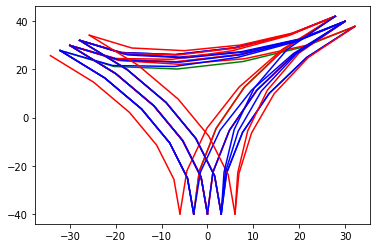

In [17]:
junctionBuilder = JunctionBuilderFromPointsAndHeading()
threePoints = [
              [-30,  30, math.radians(135)],
              [ 30,  40, math.radians(45)],
              [  0,  -40,  math.radians(270)]
            #   [ -30, -30, math.radians(225)]
              ]

odr = junctionBuilder.createIntersectionFromPoints(odrID=0,
                                                   points=threePoints,
                                                   straightRoadLen=20,
                                                   maxLanePerSide=3,
                                                   minLanePerSide=2)

odr_plot = ODRPlot(odr)
number_of_roads = len(odr.roads)
print('number of roads ', number_of_roads)
odr_plot.draw_odr(3, 0, number_of_roads)


intersection area  1751.4901326562997


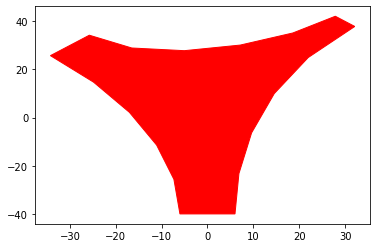

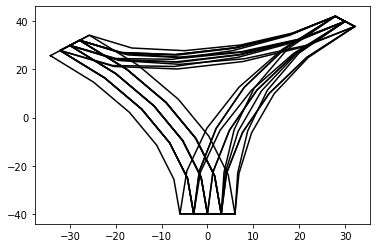

road id : area diff  1 3 -133.18108728910266
road id : area diff  1 5 -76.34626826563436
road id : area diff  1 6 201.86595800437624
road id : area diff  1 7 196.09988708210597
road id : area diff  1 8 153.26947729574786
road id : area diff  1 9 160.2977885061003
road id : area diff  1 10 167.32606526813356
road id : area diff  1 11 131.8903965291533
road id : area diff  1 12 124.8655980383491
road id : area diff  1 13 121.50085231784539
road id : area diff  1 14 193.55938779555157
road id : area diff  1 15 201.47757924220875
road id : area diff  1 16 209.23664368682557
road id : area diff  1 17 160.3085853422573
road id : area diff  1 18 153.28025601523632
road id : area diff  1 19 146.25189678913824
road id : area diff  1 20 130.71024926897422
road id : area diff  1 21 134.94200320567532
road id : area diff  3 5 56.8348190234683
road id : area diff  3 6 335.0470452934789
road id : area diff  3 7 329.28097437120863
road id : area diff  3 8 286.45056458485055
road id : area diff  3 9 2

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

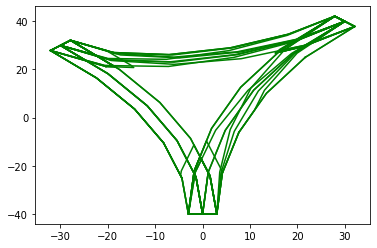

In [18]:
odr_plot.draw_intersection_area()
odr_plot.draw_road_polygon()
odr_plot.draw_conflict_zone_polygon()

In [5]:

coordinate = []
for key in odr.roads:
    road = odr.roads.get(key)
    if road.curveType == StandardCurveTypes.Line:
        print(road.id)
    elif road.curveType == StandardCurveTypes.Poly:
        # print(road.id)
        start_coordinate = road.planview.get_start_point()
        end_coordinate = road.planview.get_end_point()
        coordinate.append(start_coordinate)
        coordinate.append(end_coordinate)
        # print(start_coordinate, end_coordinate)
        # np.append(points, [start_coordinate[0], start_coordinate[1]])
        # np.append(points, [end_coordinate[0], end_coordinate[1]])
# print(len(coordinate))
array_size = len(coordinate)
points = np.empty((array_size, 2))
for i in range(0, array_size):
    points[i][0], points[i][1] = coordinate[i][0], coordinate[i][1]
print(points)

0
2
4
6
[[-3.00000000e+01  3.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [ 6.03961325e-14 -4.00000000e+01]
 [ 6.03961325e-14 -4.00000000e+01]
 [-3.00000000e+01 -3.00000000e+01]
 [-3.00000000e+01 -3.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [-2.48689958e-14 -4.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [-3.00000000e+01 -3.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [ 4.26325641e-14 -4.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [-3.00000000e+01 -3.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [ 6.03961325e-14 -4.00000000e+01]
 [-3.00000000e+01 -3.00000000e+01]
 [ 6.03961325e-14 -4.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [ 6.03961325e-14 -4.00000000e+01]
 [ 3.00000000e+01  4.00000000e+01]
 [-3.00000000e+01 -3.00000000e+01]
 [-3.00000000e+01  3.00000000e+01]
 [-3.0000000

In [6]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
# rng = np.random.default_rng()
# points = rng.random((30, 2))   # 30 random points in 2-D
# print(points)
hull = ConvexHull(points)

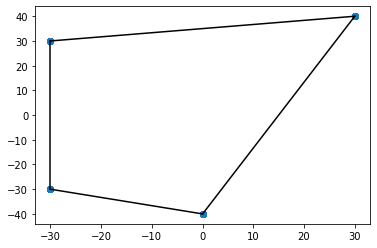

In [7]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')


In [8]:
import shapely
from shapely.geometry import Polygon
polygon = Polygon(points)
# print(polygon)
print(polygon.area)

3.637978807091713e-12


array('d', [0.0, -0.0009801714032956663, -0.001950903220161339, -0.0029028467725446755, -0.0038268343236509445, -0.004713967368260018, -0.005555702330196067, -0.006343932841636493, -0.007071067811865505, -0.007730104533627396, -0.008314696123025475, -0.008819212643483567, -0.00923879532511288, -0.009569403357322098, -0.00980785280403231, -0.009951847266721972, -0.01, -0.009951847266721967, -0.009807852804032301, -0.009569403357322086, -0.009238795325112865, -0.008819212643483548, -0.00831469612302545, -0.007730104533627367, -0.0070710678118654745, 0.49292893218813455, 0.4936560671583636, 0.494444297669804, 0.49528603263174004, 0.4961731656763491, 0.4970971532274554, 0.4980490967798387, 0.4990198285967044, 0.5, 0.5009801714032956, 0.5019509032201613, 0.5029028467725446, 0.5038268343236509, 0.50471396736826, 0.505555702330196, 0.5063439328416365, 0.5070710678118655, 1.0070710678118655, 1.0077301045336273, 1.0083146961230254, 1.0088192126434836, 1.009238795325113, 1.0095694033573221, 1.00

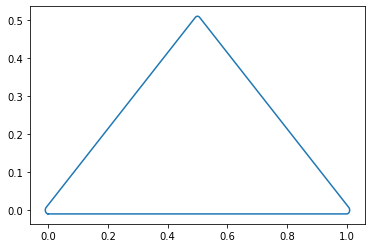

In [9]:
polygon1 = shapely.geometry.Polygon([(0, 0), (0.5, 0.5), (1,0)]).buffer(0.01)
x, y = polygon1.exterior.xy
print(x, y)
plt.plot(x, y)
print(polygon1)